In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("data_v6.csv")
df = df.dropna()
df

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,NumEmployees,...,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds,DirectorAddressLatitude,DirectorAddressLongitude,BusinessAddressLatitude,BusinessAddressLongitude,StartYear,StartDecade,IndustryShortCode,IndustryGroup
0,POULSEN & HANSEN A/S,76958211,"C/O Flethøj Ejendomsadministration ApS, Energi...",1985-01-17,NORMAL,682040,Udlejning af erhvervsejendomme,København,101,6,...,3237.0,606.0,55.671052,12.561257,55.657727,12.557978,1985,1980,68,Fast ejendom
1,SWEDISH ORPHAN BIOVITRUM A/S,19179079,Sorgenfrivej 17,1996-02-08,NORMAL,464610,Engroshandel med medicinalvarer og sygeplejear...,Lyngby-Taarbæk,173,11,...,696252.0,35422.0,59.260329,18.194250,55.137627,14.758286,1996,1990,46,Engros og detail.; rep. af motorkøretøjer og -...
2,Oticon Denmark A/S,42338028,Kongebakken 9,1972-05-26,NORMAL,465220,Engroshandel med telekommunikationsudstyr,Egedal,240,61,...,383203.0,18336.0,55.762723,12.549633,57.486851,10.337708,1972,1970,46,Engros og detail.; rep. af motorkøretøjer og -...
3,BADEN-JENSEN A/S,29167613,Baltorpbakken 16,1970-02-19,NORMAL,467320,"Engroshandel med lak, maling, tapet, gulvbelæg...",Ballerup,151,37,...,30477.0,1455.0,55.816496,12.544167,55.731771,12.338362,1970,1970,46,Engros og detail.; rep. af motorkøretøjer og -...
5,FITNESS ENGROS A/S,21830895,Snedkervej 4 - 6,1999-01-01,NORMAL,464910,"Engroshandel med cykler, sportsartikler og lys...",Høje Taastrup,169,27,...,16745.0,1030.0,55.546125,12.236087,55.638315,12.288249,1999,1990,46,Engros og detail.; rep. af motorkøretøjer og -...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,M A T ApS,26596300,Gersonsvej 7,2002-05-02,NORMAL,464210,Engroshandel med beklædning,Gentofte,157,18,...,4973.0,554.0,55.769713,12.585628,55.733208,12.566897,2002,2000,46,Engros og detail.; rep. af motorkøretøjer og -...
2165,F.A. CONSULTING A/S,27080049,"Herlev Ringvej 2C, 1.",2003-01-02,NORMAL,620200,Konsulentbistand vedrørende informationsteknologi,Herlev,163,2,...,15683.0,1169.0,55.708582,12.597020,55.723171,12.441770,2003,2000,62,Information og kommunikation
2166,A-SAFE ApS,35252932,"Rugvænget 46A, 1.",2013-06-01,NORMAL,467400,"Engroshandel med isenkram, varmeanlæg og tilbehør",Høje Taastrup,169,4,...,1568078.0,64420.0,53.706530,-1.875317,55.649471,12.285993,2013,2010,46,Engros og detail.; rep. af motorkøretøjer og -...
2167,A.A. EL-CENTER A/S,66358119,Krondalvej 7,1980-10-29,NORMAL,432100,El-installation,Rødovre,175,5,...,4805.0,544.0,55.671301,12.405901,55.700383,12.434073,1980,1980,43,Bygge- og anlægsvirksomhed


In [9]:
df_cluster1 = df[(df["BusinessAddressLongitude"] > 12) & (df["BusinessAddressLongitude"] < 13) & (df["BusinessAddressLatitude"] > 55.5) & (df["BusinessAddressLatitude"] < 56.2)]
X = np.array([[x[0], x[1]] for x in zip(df_cluster1["BusinessAddressLongitude"], df_cluster1["BusinessAddressLatitude"])])
kmeans = KMeans(n_clusters=18, random_state=0, n_init="auto").fit(X)

df_cluster1["Cluster"] = kmeans.labels_
clusterLabels = []

for l in df_cluster1["Cluster"]:
    temp_df = df_cluster1[df_cluster1["Cluster"] == l][['Area', 'Cluster']]
    label = temp_df.groupby(['Area'])['Cluster'].count().reset_index(name='count').sort_values(['count'], ascending=False).iloc[0]["Area"]
    clusterLabels.append(label)
df_cluster1["ClusterLabels"] = clusterLabels



fig = px.scatter_mapbox(df_cluster1.rename(columns={"ClusterLabels": "Labels"}), 
                        lat = 'BusinessAddressLatitude', 
                        lon = 'BusinessAddressLongitude',
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        #symbol = df_cluster1['ClusterLabels'],
                        #symbol_sequence= ['circle-open', 'circle', 'circle-open-dot', 'square'],
                        color="Labels",
                        width=800, height=800,
                        mapbox_style = 'carto-positron')

fig.update_traces(marker_symbol='star', marker_size=10, selector=dict(type='scattermapbox'))

plt.rcParams["figure.figsize"] = (20,20)
#fig.update_layout(title_text='Employees of Copenhagen', title_x=0.5)
#fig.data[0].marker.symbol = 'square'
fig.show()

C:\Users\ivart\AppData\Local\Temp\ipykernel_24784\2367435423.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ivart\AppData\Local\Temp\ipykernel_24784\2367435423.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
df[['Area', 'Cluster']].groupby(['Area'])['Cluster'].count().reset_index(name='count').sort_values(['count'], ascending=False).iloc[2]["Area"]

KeyError: "['Cluster'] not in index"

C:\Users\ivart\AppData\Local\Temp\ipykernel_24784\507658590.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



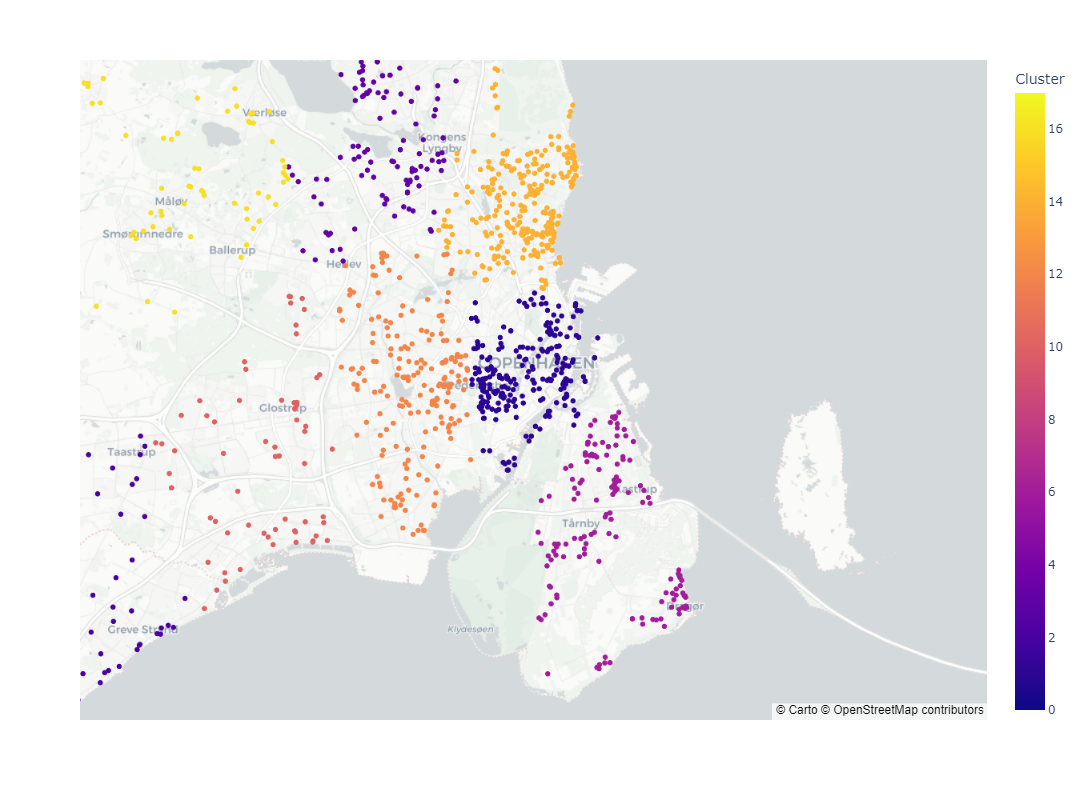

In [5]:
df_cluster2 = df[(df["DirectorAddressLongitude "] > 12) & (df["DirectorAddressLongitude "] < 13) & (df["DirectorAddressLatitude"] > 55.5) & (df["DirectorAddressLatitude"] < 56.2)]
X = np.array([[x[0], x[1]] for x in zip(df_cluster2["DirectorAddressLongitude "], df_cluster2["DirectorAddressLatitude"])])
kmeans = KMeans(n_clusters=18, random_state=0, n_init="auto").fit(X)

df_cluster2["Cluster"] = kmeans.labels_
#clusterLabels = []

#for l in df_cluster1["Cluster"]:
#    temp_df = df_cluster1[df_cluster1["Cluster"] == l][['Area', 'Cluster']]
#    label = temp_df.groupby(['Area'])['Cluster'].count().reset_index(name='count').sort_values(['count'], ascending=False).iloc[0]["Area"]
#    clusterLabels.append(label)
#df_cluster1["ClusterLabels"] = clusterLabels

fig = px.scatter_mapbox(df_cluster2, 
                        lat = 'DirectorAddressLatitude', 
                        lon = 'DirectorAddressLongitude ',
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        color="Cluster",
                        width=800, height=800,
                        mapbox_style = 'carto-positron')

plt.rcParams["figure.figsize"] = (20,20)
#fig.update_layout(title_text='Employees of Copenhagen', title_x=0.5)
fig.show()